# LAB 8

In [183]:
import sys
assert sys.version_info >= (3, 5)
# Python ≥3.5 is required


In [184]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [185]:
# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn import preprocessing
from sklearn import metrics

In [186]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [187]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is 
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier,plot_tree

# Get the data

With this code, we download and store the tgz file and extract it on the same location of the notebook and sub folders "datasets/housing/"

In [188]:
data = pd.read_csv("US_Accidents_Dec21_updated.csv")

In [189]:
data.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


All attributes are numerical, except the ocean_proximity field.

In [190]:
#This method shows a statistical summary of the numerical attributes 
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Severity,2845342.0,2.137572,0.478722,1.000000,2.000000,2.000000,2.000000,4.000000e+00
Start_Lat,2845342.0,36.245201,5.363797,24.566027,33.445174,36.098609,40.160243,4.900058e+01
Start_Lng,2845342.0,-97.114633,18.317819,-124.548074,-118.033113,-92.418076,-80.372431,-6.711317e+01
End_Lat,2845342.0,36.245321,5.363873,24.566013,33.446278,36.097987,40.161049,4.907500e+01
End_Lng,2845342.0,-97.114387,18.317632,-124.545748,-118.033331,-92.417718,-80.373383,-6.710924e+01
Distance(mi),2845342.0,0.702678,1.560361,0.000000,0.052000,0.244000,0.764000,1.551860e+02
Number,1101431.0,8089.408114,18360.093995,0.000000,1270.000000,4007.000000,9567.000000,9.999997e+06
Temperature(F),2776068.0,61.793556,18.622629,-89.000000,50.000000,64.000000,76.000000,1.960000e+02
Wind_Chill(F),2375699.0,59.658231,21.160967,-89.000000,46.000000,63.000000,76.000000,1.960000e+02
Humidity(%),2772250.0,64.365452,22.874568,1.000000,48.000000,67.000000,83.000000,1.000000e+02


In [325]:
#Use top 4 features for each of the Classes (8 total features) drop the rest
#1-WindChill, Humidity, Temperature, Visibility
#2-WindChill, WindSpeed, Humidity, Distance
#3-WindChill, WindSpeed, Distance(mi), Pressure(Air)
#4-Distance, Temperature, Wind_Chill(F), Humidity
df2 = data.filter(['Severity','Wind_Chill(F)', 'Temperature(F)', 'Humidity(%)','Wind_Speed(mph)', 'Distance(mi)', 'Pressure(in)', 'Visibility(mi)', 'Humidity(%)'])
#df2 = data.filter(['Severity','Distance(mi)','Visibility(mi)'])
df2

,Severity,Wind_Chill(F),Temperature(F),Humidity(%),Wind_Speed(mph),Distance(mi),Pressure(in),Visibility(mi),Humidity(%)
0,3,36.1,42.1,58.0,10.4,3.230,29.76,10.0,58.0
1,2,NaN,36.9,91.0,NaN,0.747,29.68,10.0,91.0
2,2,NaN,36.0,97.0,NaN,0.055,29.70,10.0,97.0
3,2,NaN,39.0,55.0,NaN,0.123,29.65,10.0,55.0
4,3,29.8,37.0,93.0,10.4,0.500,29.69,10.0,93.0
...,...,...,...,...,...,...,...,...,...
2845337,2,86.0,86.0,40.0,13.0,0.543,28.92,10.0,40.0
2845338,2,70.0,70.0,73.0,6.0,0.338,29.39,10.0,73.0
2845339,2,73.0,73.0,64.0,10.0,0.561,29.74,10.0,64.0
2845340,2,71.0,71.0,81.0,8.0,0.772,29.62,10.0,81.0


In [326]:
df2 = df2.dropna()
df2 = df2.reset_index(drop = True)
df2

,Severity,Wind_Chill(F),Temperature(F),Humidity(%),Wind_Speed(mph),Distance(mi),Pressure(in),Visibility(mi),Humidity(%)
0,3,36.1,42.1,58.0,10.4,3.230,29.76,10.0,58.0
1,3,29.8,37.0,93.0,10.4,0.500,29.69,10.0,93.0
2,2,29.2,35.6,100.0,8.1,1.427,29.66,10.0,100.0
3,2,30.0,33.1,92.0,3.5,0.521,29.63,0.5,92.0
4,2,31.8,39.0,70.0,11.5,0.491,29.59,10.0,70.0
...,...,...,...,...,...,...,...,...,...
2363634,2,86.0,86.0,40.0,13.0,0.543,28.92,10.0,40.0
2363635,2,70.0,70.0,73.0,6.0,0.338,29.39,10.0,73.0
2363636,2,73.0,73.0,64.0,10.0,0.561,29.74,10.0,64.0
2363637,2,71.0,71.0,81.0,8.0,0.772,29.62,10.0,81.0


In [318]:
from sklearn.utils import resample

sev1 = df2[df2["Severity"] == 1]
sev2 = df2[df2["Severity"] == 2]
sev3 = df2[df2["Severity"] == 3]
sev4 = df2[df2["Severity"] == 4]
#df2_upsample = resample(spam_messages,
#             replace=True,
#             n_samples=len(ham_messages),
#             random_state=42)

print(sev1.shape)
print(sev2.shape)
print(sev3.shape)
print(sev4.shape)


(25740, 3)
(2471000, 3)
(151191, 3)
(126865, 3)


In [324]:
sev1_upsample = resample(sev1,
             replace=True,
             n_samples=len(sev2),
             random_state=42)
sev3_upsample = resample(sev3,
             replace=True,
             n_samples=len(sev2),
             random_state=42)
sev4_upsample = resample(sev4,
             replace=True,
             n_samples=len(sev2),
             random_state=42)
print(sev1_upsample)
print(sev2.shape)
print(sev3_upsample)
print(sev4_upsample)

data_upsampled = pd.concat([, spam_upsample])

         Severity  Distance(mi)  Visibility(mi)
2216673         1         0.000            10.0
2164858         1         0.000             3.0
2025550         1         0.000            10.0
2060322         1         0.000            10.0
2203770         1         0.000            15.0
...           ...           ...             ...
2047860         1         0.005            10.0
2161130         1         0.852             2.0
2222681         1         0.000             7.0
2195873         1         0.000            10.0
2182217         1         0.000            10.0

[2471000 rows x 3 columns]
(2471000, 3)
         Severity  Distance(mi)  Visibility(mi)
2621123         3         0.497             1.8
2750843         3         1.784            10.0
2673738         3         1.405            10.0
2520567         3         0.151            10.0
2608838         3         3.693            10.0
...           ...           ...             ...
2460166         3         0.297            10.0

# TREE 1

In [327]:
X = df2.iloc[:, 1:].values.round(decimals=0)
y = df2.iloc[:, 0].values


In [328]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

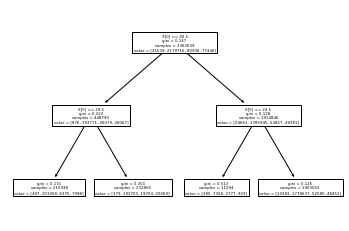

In [329]:
plot_tree(tree_clf);
plt.savefig('out1.pdf')

In [244]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()

NameError: name 'x2s' is not defined

<Figure size 576x288 with 0 Axes>

In [292]:
var_train, var_test, res_train, res_test = train_test_split(X, y, test_size = 0.3, random_state= 42)

In [ ]:
np.

In [293]:
np.count_nonzero(res_test == 1)

7712

In [294]:
decision_tree = DecisionTreeClassifier(max_depth=2, random_state=42)
decision_tree = decision_tree.fit(var_train, res_train)

In [295]:
#using the macro average would be a good choice as it treats all classes equally.
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix


res_pred = decision_tree.predict(var_test)
acc = accuracy_score(res_test, res_pred)
rec = recall_score(res_test, res_pred, average='macro')
pre = precision_score(res_test, res_pred, average='macro')
f1 = f1_score(res_test, res_pred, average='macro')

print(confusion_matrix(res_test, res_pred))
print("Accuracy:",acc)
print("Precision Score : ",pre)
print("Recall Score : ",rec)
print("F1 Score : ",f1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[     0   7712      0      0]
 [     0 741538      0      0]
 [     0  45211      0      0]
 [     0  37978      0      0]]
Accuracy: 0.8908016082860125
Precision Score :  0.22270040207150313
Recall Score :  0.25
F1 Score :  0.23556189194632451


In [296]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
 
scores = []
dt = DecisionTreeClassifier(criterion='gini', max_depth = 2, \
                        min_samples_leaf = 0.10)
for train_index, test_index in kf.split(X):0
    #print("Train index: {0}, \nTest index: {1}".format(train_index, test_index))
var_train, var_test = X[train_index], X[test_index]
res_train, res_test = y[train_index], y[test_index]
 
dt.fit(var_train, res_train)
scores.append(dt.score(var_test, res_test))
print("\n" + ("*" * 100))
print("The cross-validation scores using custom method are \n{0}".format(scores))
print("*" * 100)
 
import numpy as np
print("\n" + ("*" * 100))
print("Mean of k-fold scores using custom method is {0}".format(np.mean(scores)))
print("*" * 100)
print("\n")


****************************************************************************************************
The cross-validation scores using custom method are 
[0.6628321422522064]
****************************************************************************************************

****************************************************************************************************
Mean of k-fold scores using custom method is 0.6628321422522064
****************************************************************************************************




In [ ]:
var_train, var_test, res_train, res_test = train_test_split(X, y, test_size = 0.3)

# TREE 2

In [ ]:
X.shape

In [ ]:
y.shape

In [229]:
var_train.shape

(2497317, 2)

In [230]:
res_train.shape

(2497317,)

In [297]:
newSizeX = round(0.3 * res_train.size)
newSizey = round(0.3 * res_train.size)

newSizey
#newSizey

749195

In [298]:
#30% of previous train
X1 = var_train[0:newSizeX]
y1 = res_train[0:newSizey]


In [299]:
type(X1)

numpy.ndarray

In [306]:
var_train1, var_test1, res_train1, res_test1 = train_test_split(X1, y1, test_size = 0.3, random_state = 42)

In [307]:
decision_tree2 = DecisionTreeClassifier(max_depth=2, random_state=42)
decision_tree2 = decision_tree.fit(var_train1, res_train1)

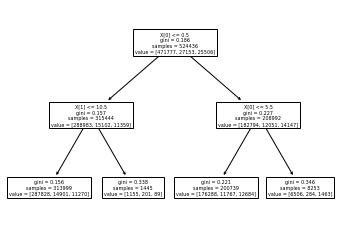

In [308]:
plot_tree(decision_tree2);
plt.savefig('out2.pdf')

In [309]:
res_pred1

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [310]:
res_pred1 = decision_tree2.predict(var_test1)
acc = accuracy_score(res_test1, res_pred1)
rec = recall_score(res_test1, res_pred1, average='macro')
pre = precision_score(res_test1, res_pred1, average='macro')
f1 = f1_score(res_test1, res_pred1, average='macro')

print(confusion_matrix(res_test1, res_pred1))
print("Accuracy:",acc)
print("Precision Score : ",pre)
print("Recall Score : ",rec)
print("F1 Score : ",f1)

[[202117      0      0]
 [ 11702      0      0]
 [ 10940      0      0]]
Accuracy: 0.8992609862118981
Precision Score :  0.2997536620706327
Recall Score :  0.3333333333333333
F1 Score :  0.31565294527372506


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# TREE 3

In [238]:
newX = round(0.6 * res_train.size)
newy = round(0.6 * res_train.size)

newX

1498390

In [239]:
X2 = var_train[0:newX]
y2 = res_train[0:newX]

In [276]:
var_train2, var_test2, res_train2, res_test2 = train_test_split(X2, y2, test_size = 0.3)

In [277]:
decision_tree3 = DecisionTreeClassifier(max_depth=4, random_state=42)
decision_tree3 = decision_tree.fit(var_train2, res_train2)

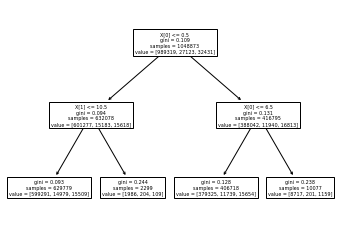

In [278]:
plot_tree(decision_tree3);
plt.savefig('out3.pdf')

In [243]:
res_pred2 = decision_tree3.predict(var_test2)
acc = accuracy_score(res_test2, res_pred2)
rec = recall_score(res_test2, res_pred2, average='macro')
pre = precision_score(res_test2, res_pred2, average='macro')
f1 = f1_score(res_test2, res_pred2, average='macro')

print("Accuracy:",acc)
print("Precision Score : ",pre)
print("Recall Score : ",rec)
print("F1 Score : ",f1)

Accuracy: 0.9427363147556155
Precision Score :  0.31424543825187184
Recall Score :  0.3333333333333333
F1 Score :  0.3235080704108854


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
